# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#set unit

unit = "imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={unit}&q="
#empty list
temperature =[]
humidity = []
cloudiness = []
windspeed = []
lat = []
lon = []
foundcities = []
country =[]
date = []

#search loop for cities list

for city in cities:
    weathercheck = requests.get(url+city).json()
#append to lists
    try:
        foundcities.append(weathercheck["name"])
        temperature.append(weathercheck["main"]["temp_max"])
        humidity.append(weathercheck["main"]["humidity"])
        cloudiness.append(weathercheck["clouds"]["all"])
        windspeed.append(weathercheck["wind"]["speed"])
        lat.append(weathercheck["coord"]["lat"])
        lon.append(weathercheck["coord"]["lon"])
        country.append(weathercheck["sys"]["country"])
        date.append(weathercheck["dt"])
        print(f'{city} found and info added')
    except:
        print(f'{city}: was not found, skipping....')
        pass
    

    

dunedin found and info added
tiksi found and info added
marinette found and info added
jacareacanga found and info added
rikitea found and info added
bolungarvik: was not found, skipping....
awjilah found and info added
amderma: was not found, skipping....
taolanaro: was not found, skipping....
cherskiy found and info added
chokurdakh found and info added
vaini found and info added
jamestown found and info added
clyde river found and info added
tecoanapa found and info added
narsaq found and info added
beian found and info added
port alfred found and info added
albany found and info added
kalawit found and info added
mayo found and info added
puerto ayora found and info added
rocha found and info added
cape town found and info added
yumen found and info added
arraial do cabo found and info added
mataura found and info added
punta arenas found and info added
bluff found and info added
lompoc found and info added
lodja found and info added
atuona found and info added
sao filipe found and

bima found and info added
haines junction found and info added
safwah: was not found, skipping....
seoul found and info added
novozybkov found and info added
monrovia found and info added
marawi found and info added
santa fe found and info added
oistins found and info added
kruisfontein found and info added
tuy hoa found and info added
svetlogorsk found and info added
pokhara found and info added
acari found and info added
ozinki found and info added
olafsvik found and info added
manggar found and info added
boa vista found and info added
louisbourg: was not found, skipping....
pacific grove found and info added
omboue found and info added
roma found and info added
havelock found and info added
dzhusaly: was not found, skipping....
kerki: was not found, skipping....
san vicente found and info added
bambanglipuro found and info added
burgthann found and info added
bajos de haina found and info added
goure found and info added
severo-kurilsk found and info added
blois found and info adde

mbandaka found and info added
hermiston found and info added
kothen found and info added
dzilam gonzalez found and info added
hokitika found and info added
vaitupu: was not found, skipping....
gigmoto found and info added
uwayl: was not found, skipping....
shimoda found and info added
loukhi found and info added
semikarakorsk found and info added
chagda: was not found, skipping....
kununurra found and info added
souillac found and info added
kailua found and info added
porto santo found and info added
rosetta found and info added
clovis found and info added
la ronge found and info added
teguise found and info added
maragogi found and info added
san antonio found and info added
okhotsk found and info added
methoni found and info added
urumqi found and info added
tashara found and info added
ushumun found and info added
la rioja found and info added
beaumont found and info added
namie found and info added
mitu found and info added
puerto escondido found and info added
irtyshskiy found an

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#create dataframe from list
weather_df = pd.DataFrame({"City": foundcities,
                               "Country": country,
                                "Temperature": temperature,
                                "Humidity": humidity,
                                "Cloudiness": cloudiness,
                                "Windspeed":windspeed,
                                "Date": date,
                                "Longitude": lon,
                                "Latitude": lat})
weather_df

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Date,Longitude,Latitude
0,Dunedin,NZ,46.00,93,95,9.89,1593022623,170.50,-45.87
1,Tiksi,RU,60.44,57,43,4.27,1593022609,128.87,71.69
2,Marinette,US,73.40,72,90,11.41,1593022670,-87.63,45.10
3,Jacareacanga,BR,93.20,49,20,5.82,1593022670,-57.75,-6.22
4,Rikitea,PF,70.48,53,94,7.94,1593022607,-134.97,-23.12
...,...,...,...,...,...,...,...,...,...
540,San Carlos,VE,87.60,59,86,3.87,1593022405,-68.58,9.66
541,Aswān,EG,98.71,10,0,15.17,1593022475,32.91,24.09
542,Takhtamygda,RU,53.73,66,54,1.28,1593022697,123.57,54.10
543,Marabu,MY,78.80,94,75,2.24,1593022453,114.01,4.41


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
toohumid = weather_df.loc[weather_df["Humidity"]>100]


In [19]:
#  Get the indices of cities that have humidity over 100%.
print(len(toohumid))

0


In [23]:
# Extract relevant fields from the data frame
plotdata = weather_df[["City","Latitude","Temperature","Humidity","Cloudiness","Windspeed"]]

# Export the City_Data into a csv
plotdata.to_csv(r'/Users/applewang/Desktop/github/api_challenge/plotdata.csv' , index=False)

plotdata.head()


,City,Latitude,Temperature,Humidity,Cloudiness,Windspeed
0,Dunedin,-45.87,46.00,93,95,9.89
1,Tiksi,71.69,60.44,57,43,4.27
2,Marinette,45.10,73.40,72,90,11.41
3,Jacareacanga,-6.22,93.20,49,20,5.82
4,Rikitea,-23.12,70.48,53,94,7.94


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

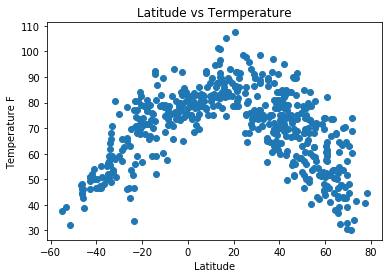

In [31]:
x_latitude = plotdata["Latitude"]
y_termperature = plotdata["Temperature"]
plt.scatter(x_lattitude,y_termperature)

plt.xlabel("Latitude")
plt.ylabel("Temperature F")
plt.title('Latitude vs Termperature')

plt.savefig("/Users/applewang/Desktop/github/api_challenge/latitude_vs_temperature.png")



## Latitude vs. Humidity Plot

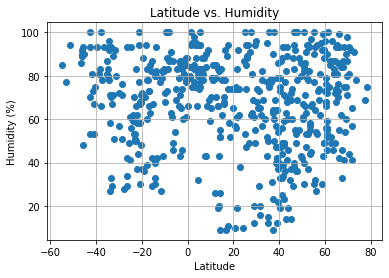

In [34]:
y_humidity = plotdata["Humidity"]
plt.scatter(x_latitude,y_humidity)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity')
plt.grid()

plt.savefig("/Users/applewang/Desktop/github/api_challenge/latitude_vs_humidity.png")


## Latitude vs. Cloudiness Plot

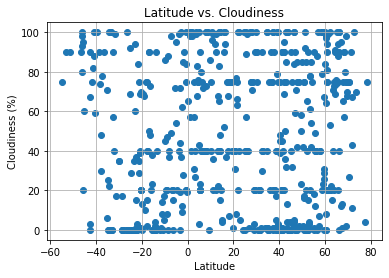

In [38]:
y_cloudiness = plotdata["Cloudiness"]
plt.scatter(x_latitude,y_cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness')
plt.grid()

plt.savefig("/Users/applewang/Desktop/github/api_challenge/latitude_vs_cloudiness.png")



## Latitude vs. Wind Speed Plot

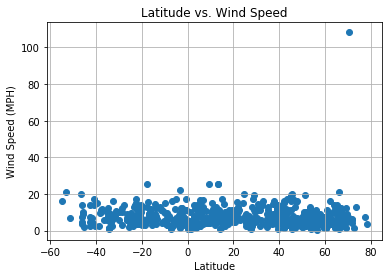

In [41]:
y_windspeed = plotdata["Windspeed"]
plt.scatter(x_latitude,y_windspeed)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('Latitude vs. Wind Speed')
plt.grid()

plt.savefig("/Users/applewang/Desktop/github/api_challenge/latitude_vs_windspeed.png")



## Linear Regression

In [7]:
# OPTIONAL: Create a function to create Linear Regression plots

In [43]:
# Create Northern and Southern Hemisphere DataFrames
northern = plotdata[plotdata["Latitude"]>= 0]
southern = plotdata[plotdata["Latitude"]<0]

northern
                    

,City,Latitude,Temperature,Humidity,Cloudiness,Windspeed
1,Tiksi,71.69,60.44,57,43,4.27
2,Marinette,45.10,73.40,72,90,11.41
5,Awjilah,29.11,86.61,20,0,11.07
6,Cherskiy,68.75,47.05,54,80,6.60
7,Chokurdakh,70.63,63.14,44,27,6.96
...,...,...,...,...,...,...
540,San Carlos,9.66,87.60,59,86,3.87
541,Aswān,24.09,98.71,10,0,15.17
542,Takhtamygda,54.10,53.73,66,54,1.28
543,Marabu,4.41,78.80,94,75,2.24


In [44]:
southern

,City,Latitude,Temperature,Humidity,Cloudiness,Windspeed
0,Dunedin,-45.87,46.00,93,95,9.89
3,Jacareacanga,-6.22,93.20,49,20,5.82
4,Rikitea,-23.12,70.48,53,94,7.94
8,Vaini,-21.20,68.00,94,75,4.70
14,Port Alfred,-33.59,68.00,33,0,5.01
...,...,...,...,...,...,...
526,Wallacetown,-46.33,46.26,90,98,7.31
531,Henties Bay,-22.12,71.01,37,0,3.76
532,Ipameri,-17.72,81.12,39,2,6.04
534,Río Bueno,-40.32,46.40,75,59,2.24


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

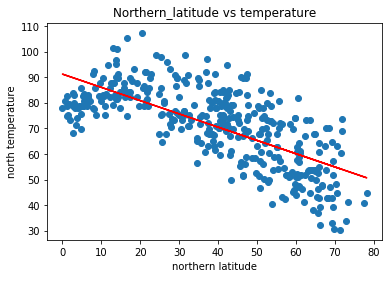

In [57]:
x_north = northern["Latitude"]
y_north_temp = northern["Temperature"]

plt.scatter(x_north,y_north_temp)

plt.title('Northern_latitude vs temperature')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north,y_north_temp)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('northern latitude')
plt.ylabel('north temperature')
plt.show()

In [ ]:
#this regression shows that the closer to the equator, the hotter it gets

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

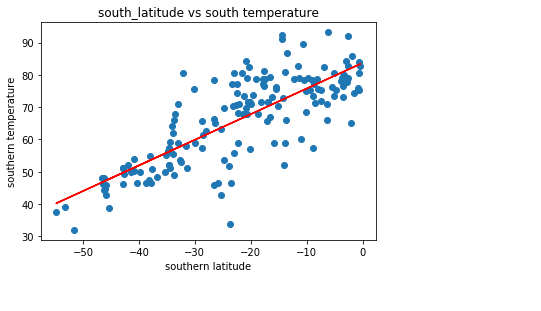

In [66]:
x_south = southern["Latitude"]
y_south_temp = southern["Temperature"]

plt.scatter(x_south,y_south_temp)

plt.title('south_latitude vs south temperature')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south,y_south_temp)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('southern latitude')
plt.ylabel('southern temperature')
plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

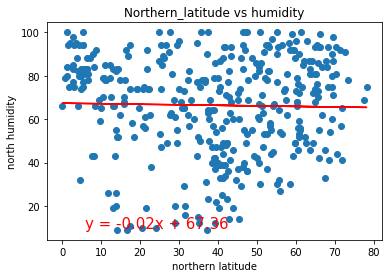

In [68]:
x_north = northern["Latitude"]
y_north_hum = northern["Humidity"]

plt.scatter(x_north,y_north_hum)

plt.title('Northern_latitude vs humidity')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north,y_north_hum)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('northern latitude')
plt.ylabel('north humidity')
plt.show()

In [ ]:
#this regression shows that there seems to not have correlation between humidity and latitude in this dataset. 
#the humidity has to be related to other factorsoutside this dataset

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

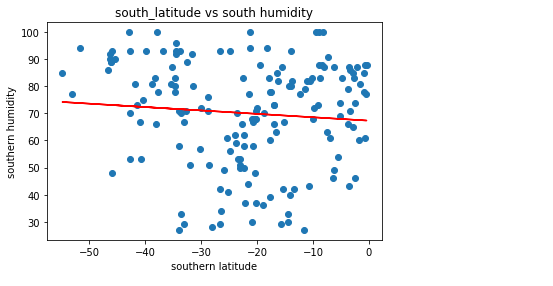

In [72]:
x_south = southern["Latitude"]
y_south_hum = southern["Humidity"]

plt.scatter(x_south,y_south_hum)

plt.title('south_latitude vs south humidity')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south,y_south_hum)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('southern latitude')
plt.ylabel('southern humidity')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

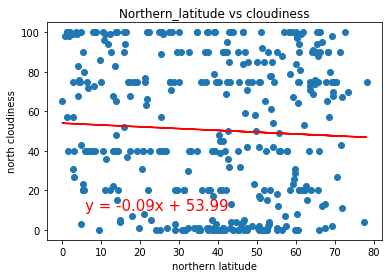

In [70]:
x_north = northern["Latitude"]
y_north_cloud = northern["Cloudiness"]

plt.scatter(x_north,y_north_cloud)

plt.title('Northern_latitude vs cloudiness')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north,y_north_cloud)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('northern latitude')
plt.ylabel('north cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

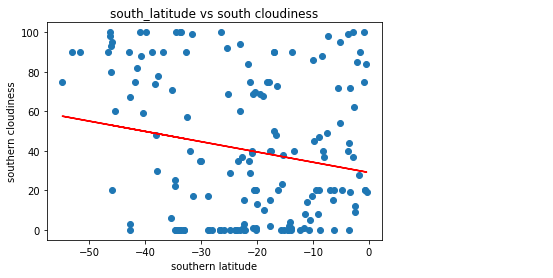

In [73]:
x_south = southern["Latitude"]
y_south_cloud = southern["Cloudiness"]

plt.scatter(x_south,y_south_cloud)

plt.title('south_latitude vs south cloudiness')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south,y_south_cloud)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('southern latitude')
plt.ylabel('southern cloudiness')
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

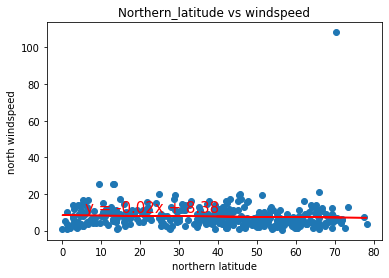

In [74]:
x_north = northern["Latitude"]
y_north_wind = northern["Windspeed"]

plt.scatter(x_north,y_north_wind)

plt.title('Northern_latitude vs windspeed')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north,y_north_wind)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('northern latitude')
plt.ylabel('north windspeed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

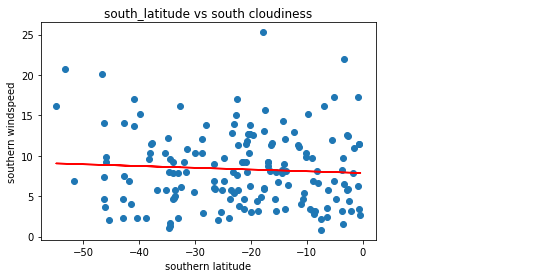

In [75]:
x_south = southern["Latitude"]
y_south_wind = southern["Windspeed"]

plt.scatter(x_south,y_south_wind)

plt.title('south_latitude vs south cloudiness')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south,y_south_wind)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('southern latitude')
plt.ylabel('southern windspeed')
plt.show()
